# Entrenamiento Q-Learning (Notebook)

Prueba rápida del flujo manual descrito en el Manifiesto: entorno Gymnasium + agente de `mlvlab` + bucle de entrenamiento explícito.

Iniciando entrenamiento...
Episodio 250: Recompensa Total = -155.0
Episodio 500: Recompensa Total = -584.0
Episodio 750: Recompensa Total = -21.0
Episodio 1000: Recompensa Total = 83.0
Episodio 1250: Recompensa Total = -20.0
Episodio 1500: Recompensa Total = 81.0
Episodio 1750: Recompensa Total = 98.0
Episodio 2000: Recompensa Total = 90.0
Episodio 2250: Recompensa Total = 87.0
Episodio 2500: Recompensa Total = 91.0
Entrenamiento finalizado.


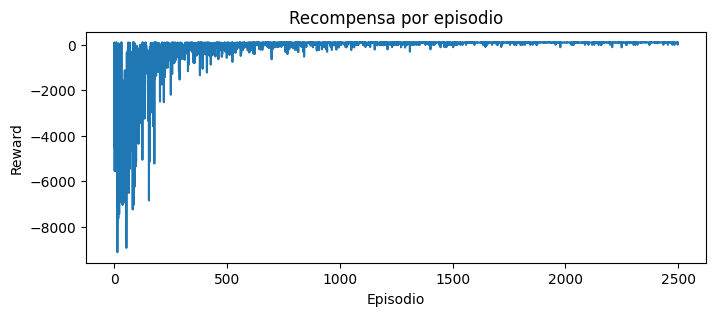

In [10]:
import gymnasium as gym
from mlvlab.agents.q_learning import QLearningAgent

# 1) Crear entorno base
env = gym.make("mlvlab/ant-v1")
GRID_SIZE = env.unwrapped.GRID_SIZE

# Adaptador manual
def obs_to_state(obs, grid_size):
    return int(obs[1]) * int(grid_size) + int(obs[0])

# 2) Crear agente
agent = QLearningAgent(
    observation_space=gym.spaces.Discrete(GRID_SIZE * GRID_SIZE),
    action_space=env.action_space,
    learning_rate=0.1,
    discount_factor=0.99,
)

# 3) Bucle de entrenamiento manual
num_episodes = 2500
print("Iniciando entrenamiento...")

rewards = []
for episode in range(num_episodes):
    obs, info = env.reset()
    state = obs_to_state(obs, GRID_SIZE)

    done = False
    total_reward = 0.0
    while not done:
        action = agent.act(state)
        next_obs, reward, terminated, truncated, info = env.step(action)
        next_state = obs_to_state(next_obs, GRID_SIZE)

        agent.learn(state, action, reward, next_state, terminated or truncated)
        state = next_state
        total_reward += reward
        done = terminated or truncated

    rewards.append(total_reward)
    if (episode + 1) % 250 == 0:
        print(f"Episodio {episode + 1}: Recompensa Total = {total_reward}")

print("Entrenamiento finalizado.")
env.close()

import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
plt.plot(rewards)
plt.title("Recompensa por episodio")
plt.xlabel("Episodio")
plt.ylabel("Reward")
plt.show()
